In [35]:
from IPython.core.display import display, HTML
from warnings import filterwarnings
display(HTML("<style>.container { width:100% !important; }</style>"))
filterwarnings(action='ignore')

In [36]:
# evalys requires pandas==0.25.3
# %matplotlib inline
from pandas import read_csv
import matplotlib
# import matplotlib.pyplot as plt
from evalys.jobset import JobSet

In [37]:
schedule = read_csv("../output/out_schedule.csv")
schedule.T

,0
batsim_version,3.1.0
consumed_joules,0
makespan,20444.8
max_slowdown,43.8394
max_turnaround_time,12852.8
max_waiting_time,10852.8
mean_slowdown,1.55863
mean_turnaround_time,395.652
mean_waiting_time,224.894
nb_computing_machines,37


In [38]:
js = JobSet.from_csv("../output/out_jobs.csv")
js.df

,jobID,workload_name,profile,submission_time,requested_number_of_resources,requested_time,success,final_state,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,allocated_resources,consumed_energy,metadata,proc_alloc
0,0,w0,0,83.000000,1,2000.0,1,COMPLETED_SUCCESSFULLY,88.738291,9.715724,98.454015,5.738291,15.454015,1.590619,[0],-1.0,NaN,1
1,0_in_30,w0,0_w0!0_in_30,83.000000,1,-1.0,1,COMPLETED_SUCCESSFULLY,83.000000,5.738191,88.738191,0.000000,5.738191,1.000000,"[30, 36]",-1.0,NaN,2
2,0_out_30,w0,0_w0!0_out_30,98.454115,1,-1.0,1,COMPLETED_SUCCESSFULLY,98.454115,5.738191,104.192306,0.000000,5.738191,1.000000,"[30, 36]",-1.0,NaN,2
3,1,w0,1,288.000000,1,2000.0,1,COMPLETED_SUCCESSFULLY,293.970229,11.952171,305.922401,5.970229,17.922401,1.499510,[0],-1.0,NaN,1
4,10,w0,10,944.000000,4,2000.0,1,COMPLETED_SUCCESSFULLY,949.496453,358.297491,1307.793945,5.496453,363.793945,1.015340,"[7, 8, 9, 10]",-1.0,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,98_out_30,w0,98_w0!98_out_30,9512.285479,1,-1.0,1,COMPLETED_SUCCESSFULLY,9512.285479,9.525005,9521.810485,0.000000,9.525006,1.000000,"[30, 36]",-1.0,NaN,2
286,99,w0,99,8588.000000,2,2000.0,1,COMPLETED_SUCCESSFULLY,8763.902521,197.313544,8961.216065,175.902521,373.216065,1.891487,"[9, 10]",-1.0,NaN,2
287,99_in_30,w0,99_w0!99_in_30,8588.000000,1,-1.0,1,COMPLETED_SUCCESSFULLY,8588.000000,8.497744,8596.497744,0.000000,8.497744,1.000000,"[30, 36]",-1.0,NaN,2
288,99_out_30,w0,99_w0!99_out_30,8961.216165,1,-1.0,1,COMPLETED_SUCCESSFULLY,8961.216165,7.972838,8969.189003,0.000000,7.972838,1.000000,"[30, 36]",-1.0,NaN,2


In [39]:
js.df.describe()

,submission_time,requested_number_of_resources,requested_time,success,starting_time,execution_time,finish_time,waiting_time,turnaround_time,stretch,consumed_energy,metadata,proc_alloc
count,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.000000,290.0,0.0,290.000000
mean,4610.884546,2.072414,689.000000,0.965517,4835.778513,170.757577,5006.536090,224.893968,395.651544,1.558634,-1.0,NaN,2.727586
std,2635.479644,3.225911,952.743444,0.182781,2980.348692,429.348906,3127.173488,1253.929287,1563.230208,3.022252,0.0,NaN,3.036958
min,83.000000,1.000000,-1.000000,0.000000,83.000000,3.935231,88.738191,0.000000,3.935231,1.000000,-1.0,NaN,1.000000
25%,2447.773660,1.000000,-1.000000,1.000000,2486.320981,7.928851,2540.505773,0.000000,7.975998,1.000000,-1.0,NaN,2.000000
50%,4580.878453,1.000000,-1.000000,1.000000,4875.515307,9.702856,5048.662032,0.000000,10.450332,1.000000,-1.0,NaN,2.000000
75%,6823.335828,1.000000,2000.000000,1.000000,6930.455522,22.776705,7086.354099,7.901758,53.526785,1.056794,-1.0,NaN,2.000000
max,10641.583656,25.000000,2000.000000,1.000000,18444.807474,2000.000000,20444.807474,10852.807474,12852.807474,43.839391,-1.0,NaN,25.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a726e20>,
      dtype=object)

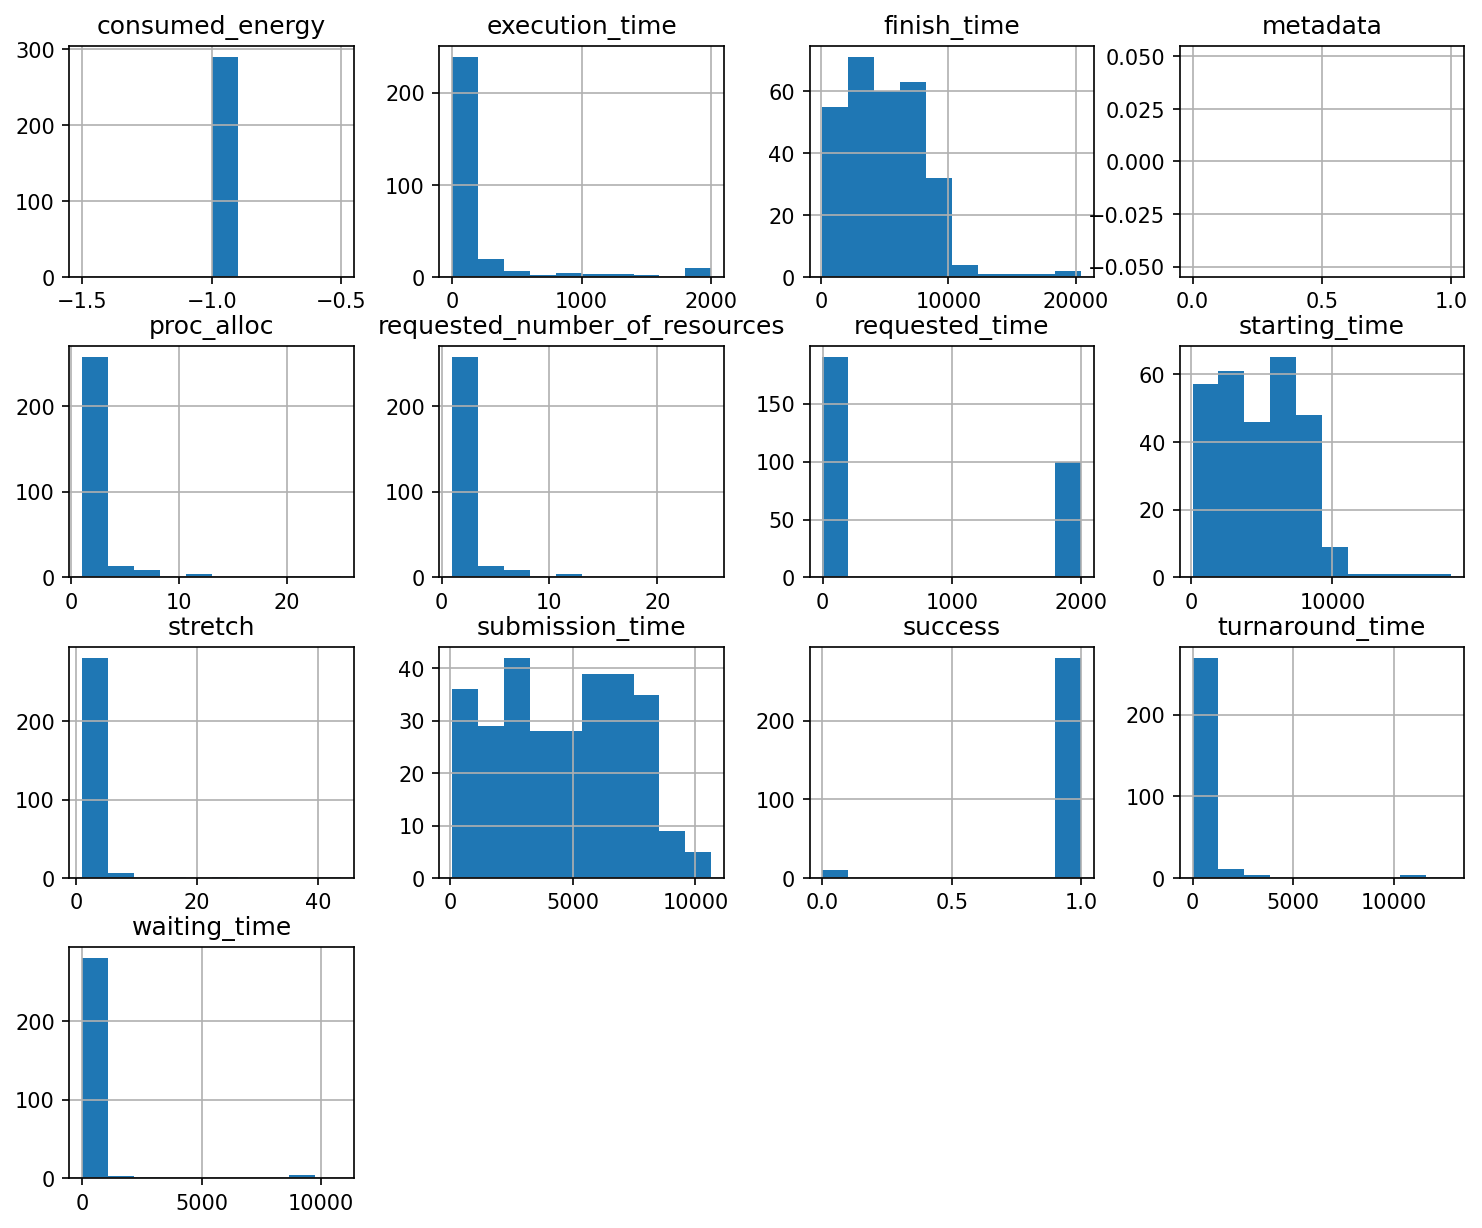

In [40]:
js.df.hist()

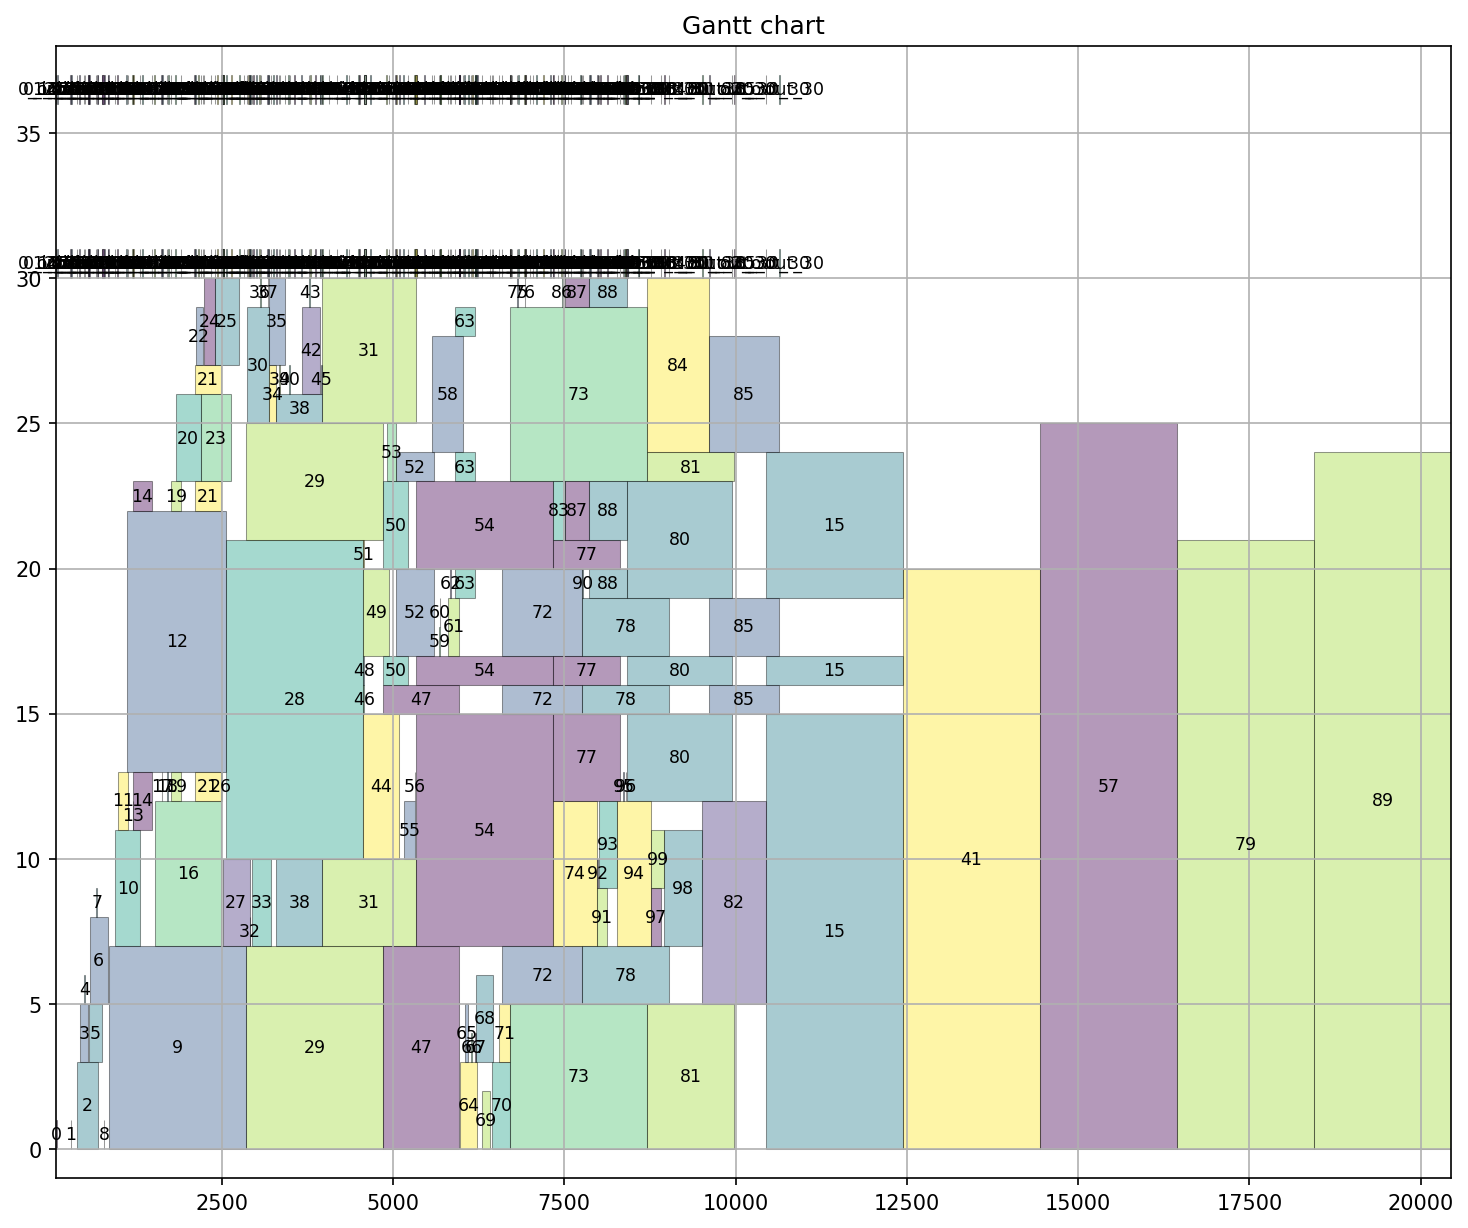

In [41]:
js.gantt()

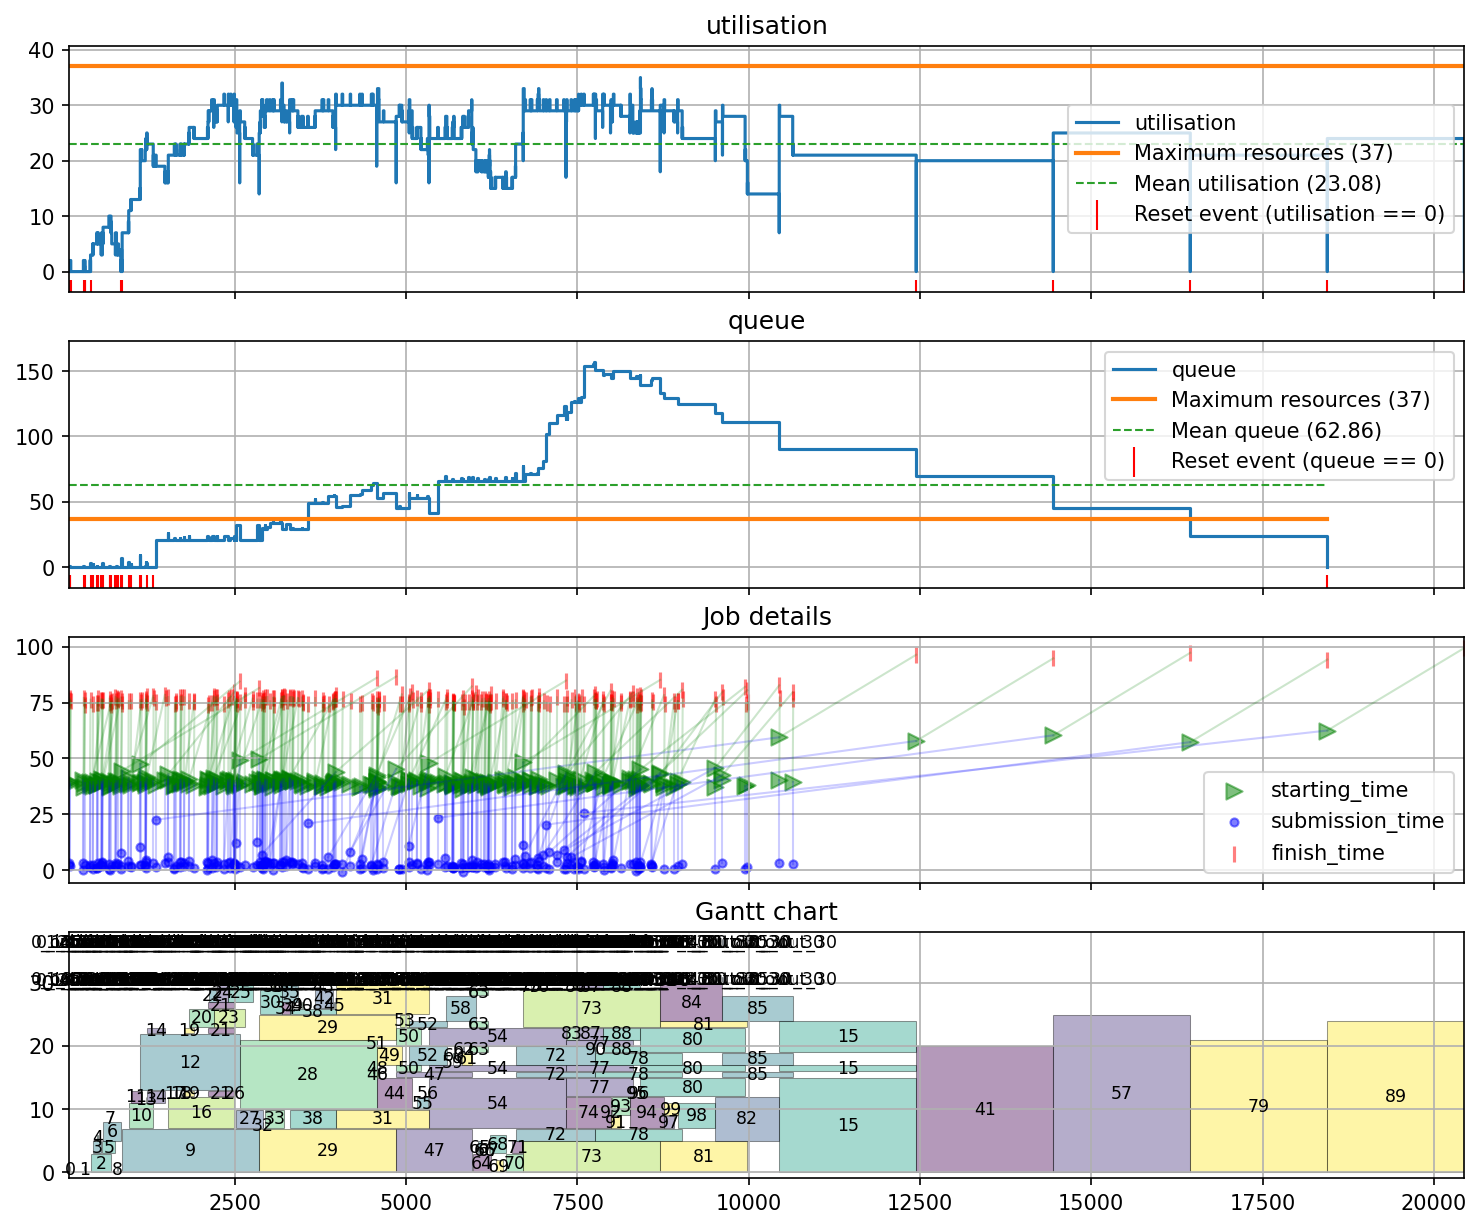

In [42]:
matplotlib.rcParams['figure.figsize'] = 12, 10
matplotlib.rcParams['figure.dpi']= 150
js.plot(with_details=True)